In [1]:
import numpy as np # linesr algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:,2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
290,39,134000,1
207,52,114000,0
39,27,31000,0
313,49,141000,1
102,32,86000,0


In [6]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [7]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# StanderdScaler

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transfrom train and test sets

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
scaler.mean_

array([3.8218750e+01, 6.9928125e+04])

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)


In [13]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,38.2,69928.1
std,10.3,34570.1
min,18.0,15000.0
25%,30.0,43000.0
50%,38.0,69500.0
75%,46.0,88000.0
max,60.0,150000.0


In [14]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.6
25%,-0.8,-0.8
50%,-0.0,-0.0
75%,0.8,0.5
max,2.1,2.3


# Effect of Scaling

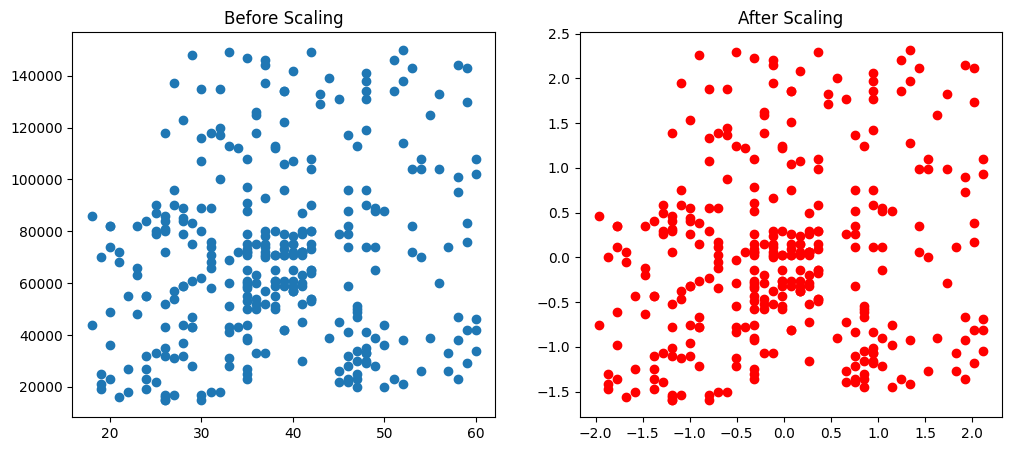

In [15]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

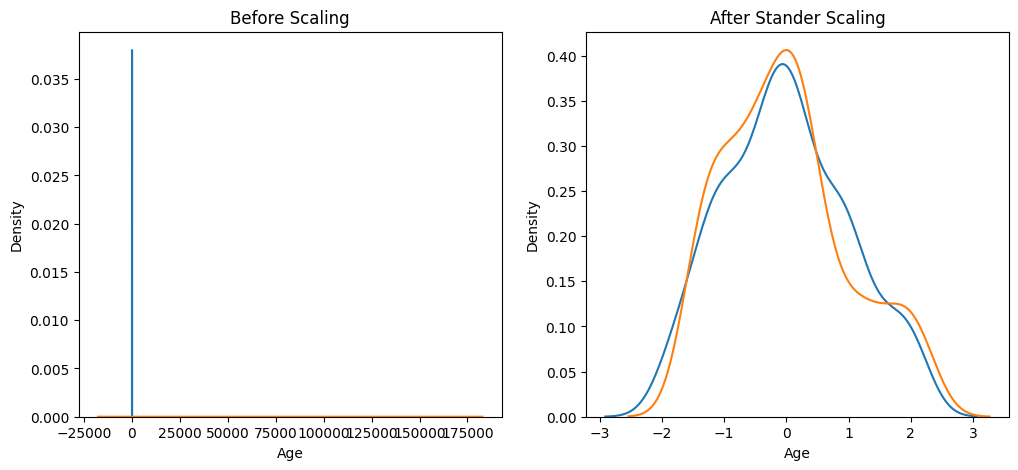

In [16]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

# after scaling
ax2.set_title('After Stander Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()


# Comparison of Distributions

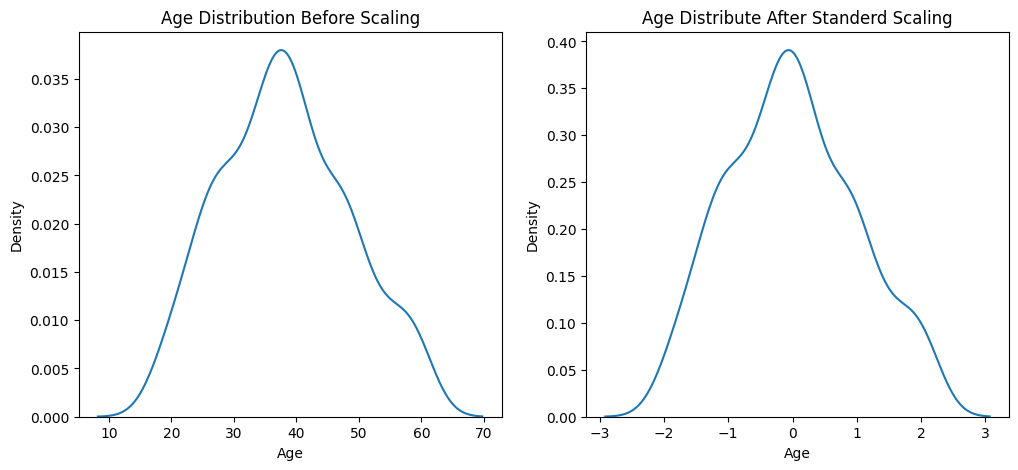

In [17]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# Before scaling
ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)

#after scaling
ax2.set_title("Age Distribute After Standerd Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
plt.show()


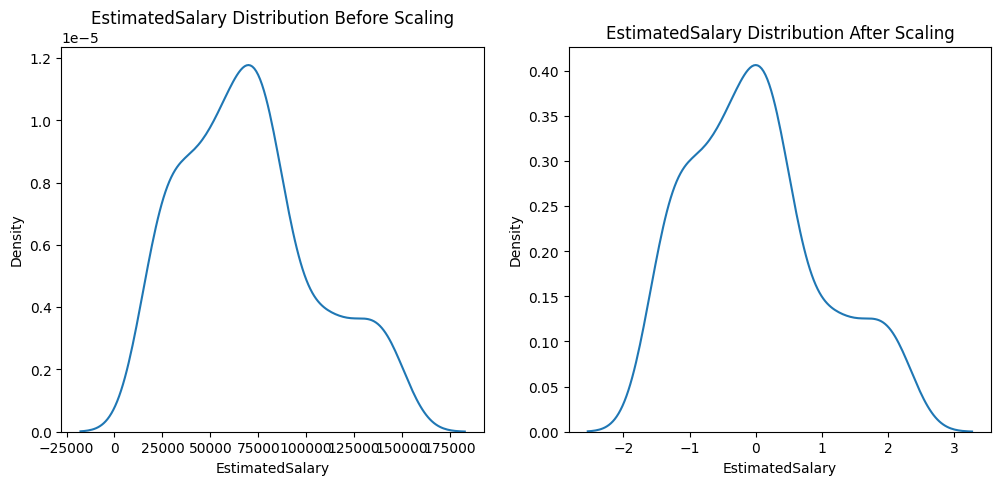

In [18]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# Before Scaling
ax1.set_title("EstimatedSalary Distribution Before Scaling")
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

# after scaping
ax2.set_title("EstimatedSalary Distribution After Scaling")
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()


# Why scaling is important?

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()
lr_scaled =LogisticRegression()

In [21]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [22]:

y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
print("Actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.725
scaled 0.925


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [27]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [28]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [29]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.9125
Scaled 0.9


In [30]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect to Outlier

In [31]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,25000,350000],'Purchased':[0,1,1]}),ignore_index=True)

C:\Users\abdul\AppData\Local\Temp\ipykernel_25028\1762984113.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,25000,350000],'Purchased':[0,1,1]}),ignore_index=True)


In [32]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,25000,1


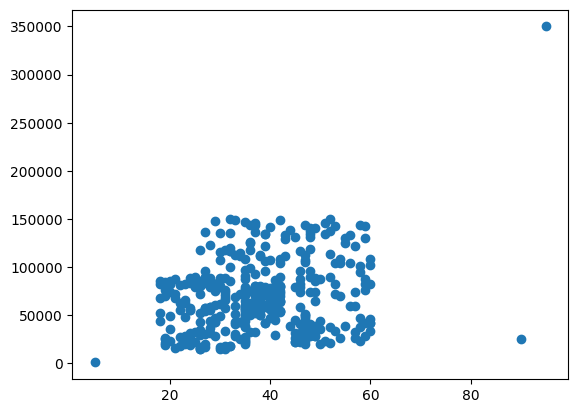

In [33]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [34]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),
                                                 df['Purchased'],test_size=0.3,random_state=0)

In [35]:
X_train.shape,X_test.shape

((282, 2), (121, 2))

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the set it will learn the parameters
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [37]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

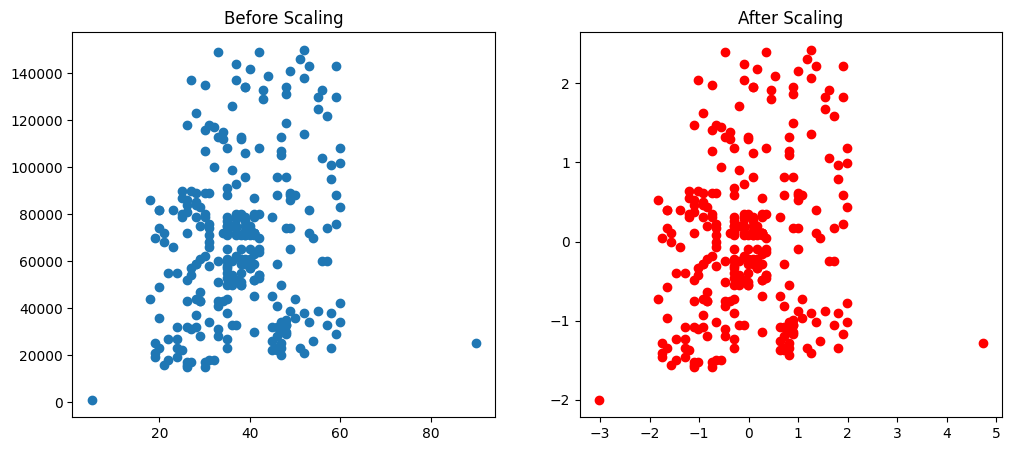

In [38]:
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')
plt.show()